In [3]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import sys
sys.path.append('../src')
import trace
import sub_process as sp
import elev_filter

TSDC username: 'ckennedy'
TSDC password: 'Summer2018!'


In [4]:
schema_name = 'roadgrade'
tbl_name = '"tsdc_caltrans_v_points_nrel_grdsrc1_ttappend_bilinCK_7-30-18"'

# Get all veh_no and samp_no for table of interest
veh_data = sp.get_unique_veh_nums_df(schema_name, tbl_name)

In [24]:
query = '''SELECT sampno, vehno, time_rel, gpsspeed, lat, lon, grade AS usgs_grade, bilin_elev, tt_grade AS tomtom_grade, bilin_grade
FROM %s.%s
WHERE grdsrc1 = TRUE''' % (schema_name, tbl_name)

# Get the data table from postgres database
all_grades = sp.query(query)

In [25]:
# Drop duplicate table from DF
all_grades_drop = all_grades.drop_duplicates(subset=['sampno', 'time_rel', 'lat', 'lon'], keep='last', inplace=False)

# Check number of duplicate rows dropped
print("New table size", all_grades_drop.shape, "Orginal table size", all_grades.shape)

((2357309, 10), (11718920, 10))


In [ ]:
# Append filtered bilin grade profile to table
all_grades_drop_filter = elev_filter.elev_filter(all_grades_drop)

In [ ]:
# Scale all grade profiles to %/100

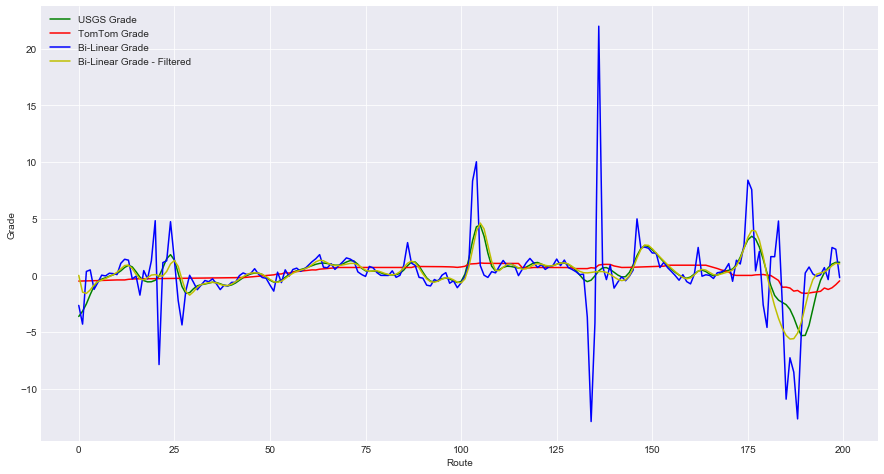

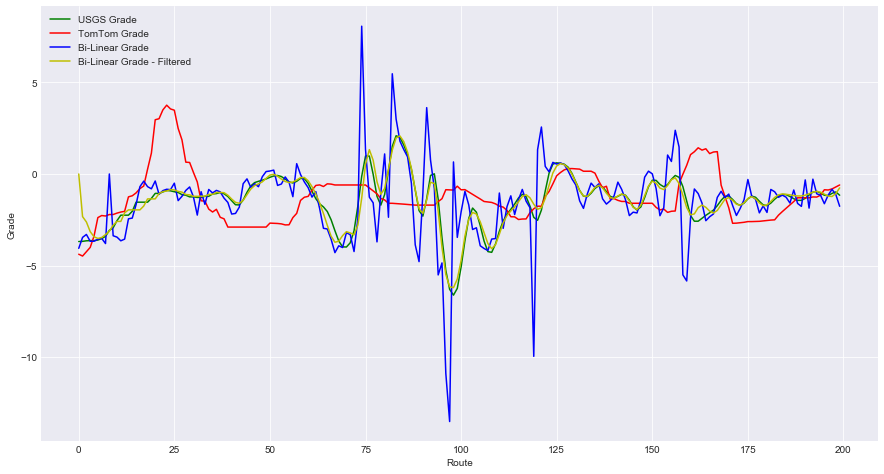

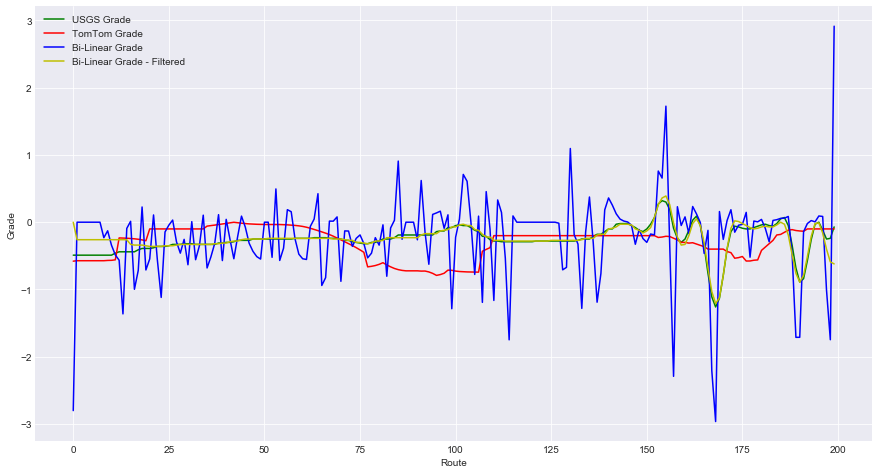

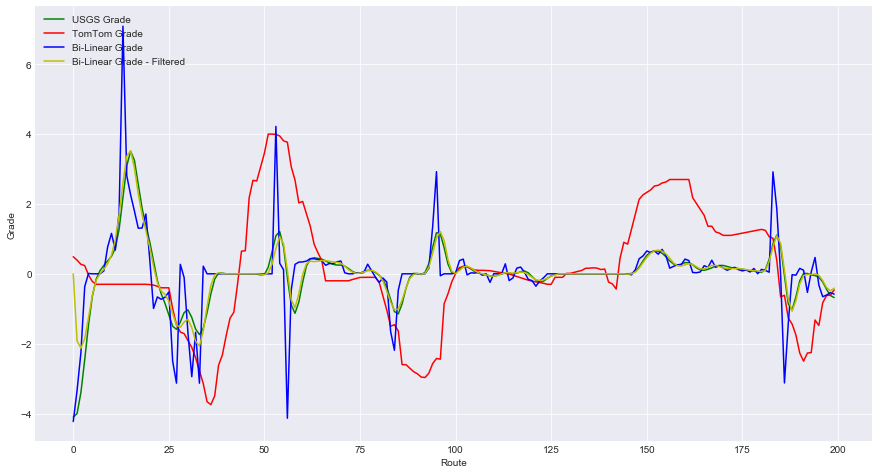

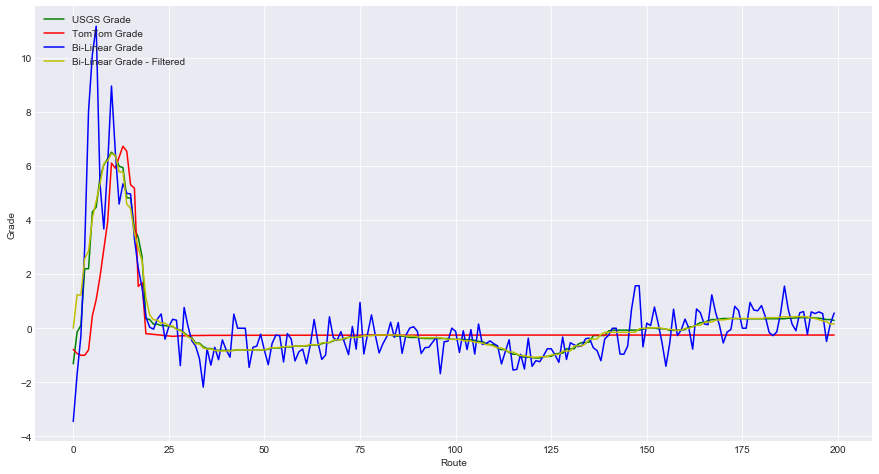

In [31]:
# Print num_plots number of tables showing 200 points from num_plots vehicles in dataset

num_plots = 5

for veh in range(num_plots):
    samp_num = veh_data['sampno'][veh]
    veh_num = veh_data['vehno'][veh]
    grades = all_grades_drop.query('sampno == %s' % samp_num).query('vehno == %s' % veh_num)[100:300]
    
    grades = elev_filter.elev_filter(grades)

    # NOTE: change style to match other plots
    plt.style.use('seaborn-darkgrid')

    x = np.arange(grades.shape[0])

    #palette = plt.get_cmap('Rdbu_r')
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)

    ax.plot(x, grades['usgs_grade']*100, c='g', label='USGS Grade')
    ax.plot(x, grades['tomtom_grade']/10, c='r', label='TomTom Grade')
    ax.plot(x, grades['bilin_grade'], c='b', label='Bi-Linear Grade')
    ax.plot(x, grades['bilin_grade_filter']*100, c='y', label='Bi-Linear Grade - Filtered')
    
    ax.set_xlabel('Route')
    ax.set_ylabel('Grade')

    plt.legend(loc=2)

plt.draw()

In [ ]:
print(range(grades.shape[0])[:50])